In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 150)

In [2]:
api_key = 'wzO4sPXoDiv46MvwwUg0uzUvJ'
api_secret_key = 'HdIVW2Qr11dgfIK0vy1QsrtzLF4gcxOijUPevo9zqdBYTfkOhC'

access_token = '475074250-RDdUhg0ufCyGeFzNatybaY3XTYznXU6ZR4UHr8WR'
access_token_secret = 'W2Snrp4tjBAvMXw58wKz2dEOXNTZas6LLMYbsMAKLePkx'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAIYePAEAAAAAR9HsgKY8KcIwDmAMxs3Otgpzgew%3D8P1CrhE4oRjAHkxU5DqXxrMsGr21025UhBEdkPJ8tz4CptBRyt'

In [3]:
auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
posts = api.search('#KohLanta',count=10, lang='fr', until='2021-04-25')

len(posts)

10

**Creation du dataframe**

In [ ]:
# posts[0].retweeted_status # Regarder si c'est un retweet, si oui le supprimer


In [194]:
def add_tweets(df, posts, debug=False):
    tmp = pd.DataFrame()
    init_shape = df.shape[0]
    
    text = []
    datetime = []
    id_str = []
    truncated = []
    city = []
    retweet_count = []
    favorite_count = []

    for tweets in posts:
        text.append(tweets.text)
        datetime.append(tweets.created_at)
        id_str.append(tweets.id_str)
        truncated.append(tweets.truncated)

        retweet_count.append(tweets.retweet_count)
        favorite_count.append(tweets.favorite_count)

        if tweets.place != None:
            city.append(tweets.place.name)
        else:
            city.append(None)


    tmp['text'] = text
    tmp['datetime'] = datetime
    tmp['id_str'] = id_str
    tmp['truncated'] = truncated
    tmp['city'] = city
    tmp['retweet_count'] = retweet_count
    tmp['favorite_count'] = favorite_count
    
    if(debug):
        print(f'Ajout de {len(posts)} tweets.')
    to_return = pd.concat([df,tmp], ignore_index=True)
    try:
        to_return.duplicated().value_counts()[True]
    except KeyError:
        nb_doublons = 0
    else:
        nb_doublons = to_return.duplicated().value_counts()[True]
    
    if(debug):
        print(f'Nombre de doublons: {nb_doublons}')
    to_return.drop_duplicates(inplace=True)
    
    if(debug):
        print(f'Tweets ajoutés au total: {to_return.shape[0] - init_shape}')
    return to_return

In [272]:
def get_tweets(df, nb_tweets, max_id=None, debug=False):
    to_return = df.copy()
    occ=1
    
    posts = api.search('#KohLanta',count=100, lang='fr', until='2021-04-24',
                      max_id=max_id)
    max_id = posts[-1].id_str
    to_return = add_tweets(to_return, posts,debug)
    
    for nb in range(int(nb_tweets/100 - 1)):
        print(occ,end='...')
        posts = api.search('#KohLanta',count=100, lang='fr', until='2021-04-24',
                       max_id=max_id) # Cherche des tweets plus anciens que cet ID
        max_id = posts[-1].id_str
        to_return = add_tweets(to_return, posts,debug)
        
        occ += 1
            
    return (to_return, max_id)

In [215]:
df = pd.DataFrame(columns=['text', 'datetime', 'id_str', 'truncated', 'city', 'retweet_count', 'favorite_count'])
df, max_id = get_tweets(df, 1000)
df.shape

(991, 7)

In [275]:
df, max_id = get_tweets(df, 30000, max_id=max_id, debug=False)
df.drop_duplicates(inplace = True, subset='id_str')
df.shape

1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...

TweepError: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))

In [274]:
df.to_csv('23_04_2021.csv', index=False)

In [9]:
data = pd.read_csv('23_04_2021.csv')

In [12]:
df.sort_values(by='id_str')

,text,datetime,id_str,truncated,city,retweet_count,favorite_count
29800,RT @ClementRodri_: Le meilleur moment de cette...,2021-04-23 21:48:20,1385712166125322251,False,NaN,5170,0
29799,Vincent mérite d’être le nouveau président #...,2021-04-23 21:48:20,1385712166309974022,False,NaN,2,16
29798,RT @tinderfrance: Nous quand on doit attendre ...,2021-04-23 21:48:20,1385712166393847813,False,NaN,529,0
29797,RT @KohLanta_OOC: Par contre jaunes c'est la m...,2021-04-23 21:48:20,1385712166418911235,False,NaN,919,0
29796,RT @Bastien_Lgl: Vincent après avoir éliminé S...,2021-04-23 21:48:20,1385712167035580416,False,NaN,3740,0
...,...,...,...,...,...,...,...
4,"RT @Lepinocchiodu84: ""Ce soir Denis j'ai décid...",2021-04-24 23:58:28,1386107301711466503,False,NaN,1,0
3,RT @OOCtvreal: Le résumé de ma vie actuellemen...,2021-04-24 23:59:03,1386107448512159746,False,NaN,3912,0
2,RT @bnks02: #KohLanta \nshanice : « un conseil...,2021-04-24 23:59:18,1386107513679065091,False,NaN,1878,0
1,RT @killwithes: elles sont franchement plus dé...,2021-04-24 23:59:34,1386107578732720130,False,NaN,791,0


'1386101970415624196'

In [183]:
int(posts[0].id_str) - int(posts[-1].id_str)

5653091323904

**Nettoyage du texte**

In [11]:
df = pd.read_csv('23_04_2021.csv')
df.shape

(29801, 7)

In [16]:
def clean_txt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.replace('KohLanta', '')
    
    return text

In [17]:
df.text = df.text.apply(clean_txt)

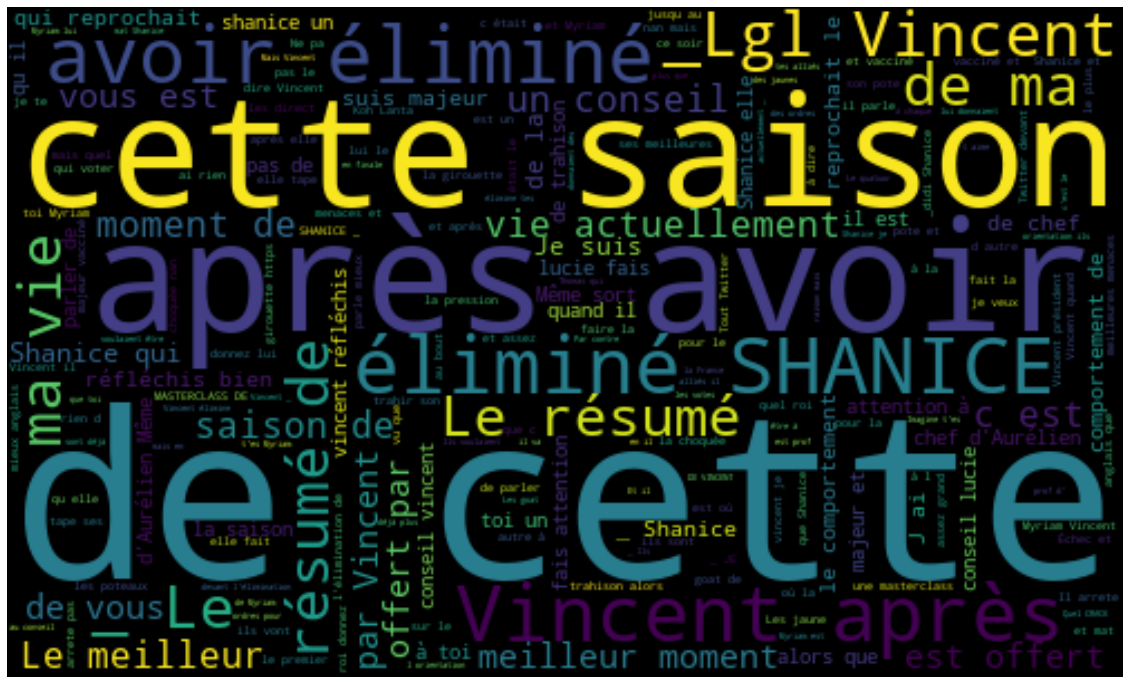

In [18]:
# word cloud visualization
allWords = ''.join([twts for twts in df.text])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=110).generate(allWords)

plt.figure(figsize=(20,20))
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

# Autres

In [11]:
# RegEx
# Comment ajouter jusqu'à 50k tweets
# Mauvaise gestion des doublons dans add_tweet ; Ajouter until 
# Passer get_tweets en do.. while
# Remplacer max_id par dernier element du df

Note sur Twitter: <br>

Tweets récup peuvent etre retweet et tweet quoted

Les tweets récupérés peuvent être des retweets -> C'est ok car ils correspondent à ce que pensent les gens
